<a href="https://colab.research.google.com/github/lauraemmanuella/IntroducaoPython/blob/main/9_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

https://pandas.pydata.org/docs/user_guide/index.html

* É uma biblioteca escrita sobre numpy
* Permite rápida visualização e limpeza de dados
* Pode trabalhar com dados de tipos diferentes
* Possui métodos próprios de visualização de dados

## Conteúdo

* Séries
* Dataframe
* Leitura e gravação em arquivos

## Serie
Uma Serie é um vetor rotulado, o que significa que **pode ser indexado por um rótulo, em vez de apenas uma localização numérica**. A Serie **pode conter qualquer objeto Python arbitrário** (estrutura heterogênea).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [2]:
import pandas as pd

In [ ]:
notas = pd.Series([2,7,5,10,6]) #serie com rotulos default, cujos valores vem de uma lista

In [ ]:
print(notas)

0     2
1     7
2     5
3    10
4     6
dtype: int64


In [ ]:
print(notas[0]) #elemento da Série na posição 0

2


In [ ]:
print(notas.values) #values -> atributo da Serie

[ 2  7  5 10  6]


In [ ]:
print(notas.index) #index -> atributo da Serie

RangeIndex(start=0, stop=5, step=1)


In [ ]:
print(notas.dtypes) #dtypes -> atributo da Serie

int64


In [ ]:
#serie com rotulos definidos
notas = pd.Series([2,7,5,10,5], index=['Wilfred', 'Abbie', 'Harry', 'Julia', 'Carrie'])

In [ ]:
print(notas)

Wilfred     2
Abbie       7
Harry       5
Julia      10
Carrie      5
dtype: int64


In [ ]:
notas['Julia'] #elemento da Série no rótulo 'Júlia'

10

Outra facilidade proporcionada pela estrutura são seus métodos que fornecem informações estatísticas sobre os valores, como média e desvio padrão

Observar na Referência da API: https://pandas.pydata.org/pandas-docs/stable/reference/series.html

In [ ]:
print('Média:', notas.mean())
print('Desvio padrão:', notas.std())

Média: 5.8
Desvio padrão: 2.949576240750525


In [ ]:
notas.sort_values() #ordena 

Wilfred     2
Harry       5
Carrie      5
Abbie       7
Julia      10
dtype: int64

In [ ]:
notas.describe() #informações estatísticas sobre os dados

count     5.000000
mean      5.800000
std       2.949576
min       2.000000
25%       5.000000
50%       5.000000
75%       7.000000
max      10.000000
dtype: float64

In [ ]:
notas.max()

10

In [ ]:
notas.min()

2

In [ ]:
notas.value_counts() #conta quantas ocorrencias de cada valor

5     2
7     1
10    1
2     1
dtype: int64

In [ ]:
#criando uma serie a partir de um dicionario (nesse caso, valores e rotulos já estão na estrutura passada)
seriecategorica = pd.Series({'nome': 'Laura', 'curso': 'TADS', 'função': 'professor'})

In [ ]:
print(seriecategorica)

nome          Laura
curso          TADS
função    professor
dtype: object


In [ ]:
print(seriecategorica.dtypes)

object


In [ ]:
'''
Para dados categóricos (objetos, strings...), o resultado vai incluir count, unique, top, e freq. 
O top é o valor mais comum. O freq é a frequência do valor mais comum
'''
print(seriecategorica.describe())

count             3
unique            3
top       professor
freq              1
dtype: object


## Dataframe

Já um DataFrame é uma estrutura bidimensional de dados, como uma **planilha**. Podemos pensar em um DataFrame como um conjunto de objetos de Série juntos compartilhando o mesmo índice (linha)

Como o DataFrame possui 2 eixos: axis = 0 ou axis ='index' indica as linhas, axis = 1 ou axis = 'columns' indica as colunas

Por padrão, as operações feitas sobre um DataFrame ocorrem sobre as linhas (axis = 0), mas atenção com isso.

https://qastack.com.br/programming/22149584/what-does-axis-in-pandas-mean


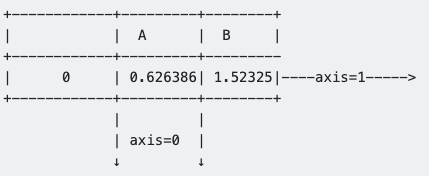

In [153]:
from IPython.display import Image
Image('./axis.png')

In [17]:
import numpy as np

#Criando um dataframe aleatorio indicando os rotulos de indice e colunas
dfAleatorio = pd.DataFrame(np.random.rand(5,4),index=['A', 'B', 'C', 'D', 'E'],columns=['W', 'X', 'Y', 'Z'])

In [18]:
dfAleatorio

,W,X,Y,Z
A,0.233318,0.495753,0.440746,0.067530
B,0.295169,0.074657,0.530189,0.439727
C,0.078014,0.178280,0.039313,0.202774
D,0.542445,0.313590,0.481832,0.740618
E,0.796143,0.715195,0.822837,0.160964


In [1]:
#Dicionário
raw_data = {'nome': ['Pedro', 'Joaquim','Marcos', 'Mateus'],
            'age': [20, 19, 22, 21], 
            'cor_favorita': ['azul', 'amarelo', 'cinza', 'verde'],
            'nota_final': [8.8, 9.2, 9.5, 7.0], 
            'data_nasc': ['01-02-2000', '08-05-1997', '04-28-1996', '12-16-1995']}

In [3]:
dfDict = pd.DataFrame(raw_data) #criando DataFrame a partir de um dicionário

In [4]:
dfDict

,nome,age,cor_favorita,nota_final,data_nasc
0,Pedro,20,azul,8.8,01-02-2000
1,Joaquim,19,amarelo,9.2,08-05-1997
2,Marcos,22,cinza,9.5,04-28-1996
3,Mateus,21,verde,7.0,12-16-1995


In [5]:
dfDict.set_index('nome', inplace= True) #define uma coluna para ser os rótulos dos índices (linhas)

In [6]:
dfDict

,age,cor_favorita,nota_final,data_nasc
nome,,,,
Pedro,20,azul,8.8,01-02-2000
Joaquim,19,amarelo,9.2,08-05-1997
Marcos,22,cinza,9.5,04-28-1996
Mateus,21,verde,7.0,12-16-1995


### loc

Pode-se (**recomendado**) usar o método loc para localizar linhas ou pedaços do dataframe pelos rótulos

Sintaxe:

> loc[linhas, colunas]

Onde as linhas e colunas podem ser passadas em sequencia (:) ou saltos (,)

*Se em saltos, colocar entre [ ]*

In [30]:
dfDict.loc['Pedro']#retorna uma Série

#Nesse caso, quando passamos apenas um rótulo, ele se refere ao Index (linha)
#É o mesmo resultado de dfDict.loc['Pedro', :] linha Pedro, colunas todas

age                     20
cor_favorita          azul
nota_final             8.8
data_nasc       01-02-2000
Name: Pedro, dtype: object

In [24]:
dfDict.loc[:, 'data_nasc'] #para localizar todas as linhas de uma coluna, usamos :

nome
Pedro      01-02-2000
Joaquim    08-05-1997
Marcos     04-28-1996
Mateus     12-16-1995
Name: data_nasc, dtype: object

In [35]:
dfDict.loc[['Pedro']] #retorna um Dataframe

#mesmo que dfDict.loc[['Pedro'], :]

,age,cor_favorita,nota_final,data_nasc
nome,,,,
Pedro,20,azul,8.8,01-02-2000


In [15]:
dfDict.loc['Pedro', 'data_nasc'] #um elemento qualquer [linha, coluna]

'01-02-2000'

In [32]:
dfDict.loc[ 'Pedro': 'Marcos', 'age':'nota_final'] #um pedaço qualquer pegando sequencias

,age,cor_favorita,nota_final
nome,,,
Pedro,20,azul,8.8
Joaquim,19,amarelo,9.2
Marcos,22,cinza,9.5


In [33]:
dfDict.loc[ ['Pedro', 'Marcos'], ['age','nota_final']]  #um pedaço qualquer com saltos

,age,nota_final
nome,,
Pedro,20,8.8
Marcos,22,9.5


In [34]:
dfDict.loc[ 'Pedro': 'Marcos', ['age','nota_final']] #um pedaço qualquer

#sequencia de linhas, apenas 2 colunas específicas

,age,nota_final
nome,,
Pedro,20,8.8
Joaquim,19,9.2
Marcos,22,9.5


### iloc

Pode-se usar o método iloc para localizar linhas ou pedaços do dataframe pelos **índices numéricos (posicionais)**

**Sintaxe (igual a do loc)**:

iloc[linhas, colunas]

Onde as linhas e colunas podem usar sequencias (:) ou saltos (,)

**A diferença de iloc para loc é que loc usa os rotulos, enquanto iloc usa os indices numericos default**

In [29]:
dfDict.iloc[0:2, 0:2] #um pedaço qualquer sequencial

,age,cor_favorita
nome,,
Pedro,20,azul
Joaquim,19,amarelo


In [28]:
dfDict.iloc[[0,2], [0,2]] #um pedaço qualquer com saltos

,age,nota_final
nome,,
Pedro,20,8.8
Marcos,22,9.5


In [36]:
dfDict.iloc[[0,2], 0:2] #um pedaço qualquer

,age,cor_favorita
nome,,
Pedro,20,azul
Marcos,22,cinza


**Fazendo alterações**

In [37]:
dfAleatorio.iloc[[0,2], [0,2]] = 2019

In [38]:
dfAleatorio.loc['A', 'X'] = 99

In [39]:
dfAleatorio

,W,X,Y,Z
A,2019.000000,99.000000,2019.000000,0.067530
B,0.295169,0.074657,0.530189,0.439727
C,2019.000000,0.178280,2019.000000,0.202774
D,0.542445,0.313590,0.481832,0.740618
E,0.796143,0.715195,0.822837,0.160964


**Adicionando colunas**

In [40]:
dfAleatorio['XY'] = dfAleatorio['X'] + dfAleatorio['Y']

In [41]:
dfAleatorio

,W,X,Y,Z,XY
A,2019.000000,99.000000,2019.000000,0.067530,2118.000000
B,0.295169,0.074657,0.530189,0.439727,0.604846
C,2019.000000,0.178280,2019.000000,0.202774,2019.178280
D,0.542445,0.313590,0.481832,0.740618,0.795422
E,0.796143,0.715195,0.822837,0.160964,1.538032


**Removendo colunas**

In [42]:
dfAleatorio.drop('XY') #aqui dá erro, pois o axis default é 0,precisamos dizer que é axis=1

KeyError: ignored

In [43]:
dfAleatorio.drop('XY', axis=1)

,W,X,Y,Z
A,2019.000000,99.000000,2019.000000,0.067530
B,0.295169,0.074657,0.530189,0.439727
C,2019.000000,0.178280,2019.000000,0.202774
D,0.542445,0.313590,0.481832,0.740618
E,0.796143,0.715195,0.822837,0.160964


In [45]:
dfAleatorio #Não removeu da estrutura, apenas retornou o df sem a coluna

,W,X,Y,Z,XY
A,2019.000000,99.000000,2019.000000,0.067530,2118.000000
B,0.295169,0.074657,0.530189,0.439727,0.604846
C,2019.000000,0.178280,2019.000000,0.202774,2019.178280
D,0.542445,0.313590,0.481832,0.740618,0.795422
E,0.796143,0.715195,0.822837,0.160964,1.538032


**Para remover permanentemente, use o argumento inplace**

In [46]:
dfAleatorio.drop('XY', axis=1, inplace=True)

In [47]:
dfAleatorio

,W,X,Y,Z
A,2019.000000,99.000000,2019.000000,0.067530
B,0.295169,0.074657,0.530189,0.439727
C,2019.000000,0.178280,2019.000000,0.202774
D,0.542445,0.313590,0.481832,0.740618
E,0.796143,0.715195,0.822837,0.160964


## Leitura de arquivos CSV

In [49]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/IntroPython

/content/drive/MyDrive/Colab Notebooks/IntroPython


In [51]:
df = pd.read_csv('./BaseAlunos.csv') #colocar caminho correto para o arquivo

In [52]:
df

,Matrícula,Nome,Unid. 1,Unid. 2,Unid. 3,Rec.,Resultado,Faltas,Sit.
0,2020001,ANA SILVA,10.0,4.0,2.0,8.00,7.3,7.0,APR
1,2020002,BRUNO SOUZA,7.0,1.0,4.0,4.00,5.0,1.0,APR
2,2020003,CARLA OLIVEIRA,7.0,0.0,2.0,3.00,4.0,11.0,REP
3,2020004,DAVID ANDRADE,3.0,0.0,5.0,4.00,4.0,17.0,REP
4,2020005,EVELIN MATIAS,8.0,10.0,2.0,4.00,7.3,11.0,APR
5,2020006,FRANCISCO JOSÉ,3.0,8.0,6.0,-,5.7,17.0,APRN
6,2020007,GABRIEL SOARES,10.0,6.0,6.0,-,7.3,0.0,APR
7,2020008,HEITOR NEVES,3.0,10.0,9.0,-,7.3,15.0,APR
8,2020009,INGRID DA SILVA,0.0,5.0,2.0,0.00,2.3,20.0,REMF
9,2020010,JOSÉ MARIA SANTOS,9.0,2.0,0.0,2.00,4.3,17.0,REP


In [53]:
df.head(3)

,Matrícula,Nome,Unid. 1,Unid. 2,Unid. 3,Rec.,Resultado,Faltas,Sit.
0,2020001,ANA SILVA,10.0,4.0,2.0,8.00,7.3,7.0,APR
1,2020002,BRUNO SOUZA,7.0,1.0,4.0,4.00,5.0,1.0,APR
2,2020003,CARLA OLIVEIRA,7.0,0.0,2.0,3.00,4.0,11.0,REP


In [54]:
df.tail(3)

,Matrícula,Nome,Unid. 1,Unid. 2,Unid. 3,Rec.,Resultado,Faltas,Sit.
7,2020008,HEITOR NEVES,3.0,10.0,9.0,-,7.3,15.0,APR
8,2020009,INGRID DA SILVA,0.0,5.0,2.0,0.00,2.3,20.0,REMF
9,2020010,JOSÉ MARIA SANTOS,9.0,2.0,0.0,2.00,4.3,17.0,REP


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Matrícula  10 non-null     int64  
 1   Nome       10 non-null     object 
 2   Unid. 1    10 non-null     float64
 3   Unid. 2    10 non-null     float64
 4   Unid. 3    10 non-null     float64
 5   Rec.       10 non-null     object 
 6   Resultado  10 non-null     float64
 7   Faltas     10 non-null     float64
 8   Sit.       10 non-null     object 
dtypes: float64(5), int64(1), object(3)
memory usage: 848.0+ bytes


In [56]:
df.describe()

,Matrícula,Unid. 1,Unid. 2,Unid. 3,Resultado,Faltas
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.020006e+06,6.000000,4.600000,3.800000,5.450000,11.600000
std,3.027650e+00,3.496029,3.864367,2.699794,1.807546,6.979335
min,2.020001e+06,0.000000,0.000000,0.000000,2.300000,0.000000
25%,2.020003e+06,3.000000,1.250000,2.000000,4.075000,8.000000
50%,2.020006e+06,7.000000,4.500000,3.000000,5.350000,13.000000
75%,2.020008e+06,8.750000,7.500000,5.750000,7.300000,17.000000
max,2.020010e+06,10.000000,10.000000,9.000000,7.300000,20.000000


In [57]:
df.describe().drop('Matrícula', axis=1)

,Unid. 1,Unid. 2,Unid. 3,Resultado,Faltas
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.000000,4.600000,3.800000,5.450000,11.600000
std,3.496029,3.864367,2.699794,1.807546,6.979335
min,0.000000,0.000000,0.000000,2.300000,0.000000
25%,3.000000,1.250000,2.000000,4.075000,8.000000
50%,7.000000,4.500000,3.000000,5.350000,13.000000
75%,8.750000,7.500000,5.750000,7.300000,17.000000
max,10.000000,10.000000,9.000000,7.300000,20.000000


In [58]:
df['Nome'] #retorna uma Serie

0            ANA SILVA
1          BRUNO SOUZA
2       CARLA OLIVEIRA
3        DAVID ANDRADE
4        EVELIN MATIAS
5       FRANCISCO JOSÉ
6       GABRIEL SOARES
7         HEITOR NEVES
8      INGRID DA SILVA
9    JOSÉ MARIA SANTOS
Name: Nome, dtype: object

In [59]:
df[['Unid. 1']] #retorna um dataframe

,Unid. 1
0,10.0
1,7.0
2,7.0
3,3.0
4,8.0
5,3.0
6,10.0
7,3.0
8,0.0
9,9.0


In [61]:
df[['Nome','Sit.']]

,Nome,Sit.
0,ANA SILVA,APR
1,BRUNO SOUZA,APR
2,CARLA OLIVEIRA,REP
3,DAVID ANDRADE,REP
4,EVELIN MATIAS,APR
5,FRANCISCO JOSÉ,APRN
6,GABRIEL SOARES,APR
7,HEITOR NEVES,APR
8,INGRID DA SILVA,REMF
9,JOSÉ MARIA SANTOS,REP


In [62]:
df['Unid. 1'].mean() #media da coluna

6.0

In [63]:
df['Unid. 1'].std() #desvio padrao da coluna

3.496029493900505

In [64]:
x = [df['Unid. 1'].mean(), df['Unid. 2'].mean(), df['Unid. 3'].mean()]

In [ ]:
type(x)

list

In [ ]:
print(x)

[6.0, 4.6, 3.8]


In [65]:
y = df[['Unid. 1','Unid. 2', 'Unid. 3']].mean()

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
print(y)

Unid. 1    6.0
Unid. 2    4.6
Unid. 3    3.8
dtype: float64


**Criando colunas usando Series**

In [66]:
df['New'] = pd.Series(['S', 'N', 'S', 'N','S', 'N','S', 'N','S', 'N', 'Y'])

In [67]:
df

,Matrícula,Nome,Unid. 1,Unid. 2,Unid. 3,Rec.,Resultado,Faltas,Sit.,New
0,2020001,ANA SILVA,10.0,4.0,2.0,8.00,7.3,7.0,APR,S
1,2020002,BRUNO SOUZA,7.0,1.0,4.0,4.00,5.0,1.0,APR,N
2,2020003,CARLA OLIVEIRA,7.0,0.0,2.0,3.00,4.0,11.0,REP,S
3,2020004,DAVID ANDRADE,3.0,0.0,5.0,4.00,4.0,17.0,REP,N
4,2020005,EVELIN MATIAS,8.0,10.0,2.0,4.00,7.3,11.0,APR,S
5,2020006,FRANCISCO JOSÉ,3.0,8.0,6.0,-,5.7,17.0,APRN,N
6,2020007,GABRIEL SOARES,10.0,6.0,6.0,-,7.3,0.0,APR,S
7,2020008,HEITOR NEVES,3.0,10.0,9.0,-,7.3,15.0,APR,N
8,2020009,INGRID DA SILVA,0.0,5.0,2.0,0.00,2.3,20.0,REMF,S
9,2020010,JOSÉ MARIA SANTOS,9.0,2.0,0.0,2.00,4.3,17.0,REP,N


**Transformando uma coluna em indice das linhas**

In [68]:
df.set_index('Nome', inplace= True)

In [ ]:
df

,Matrícula,Unid. 1,Unid. 2,Unid. 3,Rec.,Resultado,Faltas,Sit.,New
Nome,,,,,,,,,
ANA SILVA,2020001,10.0,4.0,2.0,8.00,7.3,7.0,APR,S
BRUNO SOUZA,2020002,7.0,1.0,4.0,4.00,5.0,1.0,APR,N
CARLA OLIVEIRA,2020003,7.0,0.0,2.0,3.00,4.0,11.0,REP,S
DAVID ANDRADE,2020004,3.0,0.0,5.0,4.00,4.0,17.0,REP,N
EVELIN MATIAS,2020005,8.0,10.0,2.0,4.00,7.3,11.0,APR,S
FRANCISCO JOSÉ,2020006,3.0,8.0,6.0,-,5.7,17.0,APRN,N
GABRIEL SOARES,2020007,10.0,6.0,6.0,-,7.3,0.0,APR,S
HEITOR NEVES,2020008,3.0,10.0,9.0,-,7.3,15.0,APR,N
INGRID DA SILVA,2020009,0.0,5.0,2.0,0.00,2.3,20.0,REMF,S


In [ ]:
df.loc['ANA SILVA'] # localiza uma linha a partir do novo indice colocado

Matrícula    2020001
Unid. 1           10
Unid. 2            4
Unid. 3            2
Rec.            8.00
Resultado        7.3
Faltas             7
Sit.             APR
New                S
Name: ANA SILVA, dtype: object

## Gravação de arquivos CSV

In [70]:
df.to_csv('./exemplodf.csv') 